# Exploratory Data Analysis - Terrorism

## We have to find out the hot zone of terrorism

#### Author - Shaluka Sinha

In [30]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding ='latin =1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [33]:
df.shape

(181691, 135)

In [34]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [36]:
# Renaming the columns for better understanding
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [37]:
# Drop out the irrelevant columns & considering important data for further processing

df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [38]:
df['Killed']=df['Killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)
df['casualties']=df['Killed']+df['Wounded']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  float64
 11  Wounded      181691 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
 18  casualties   181691 non-

In [39]:
# Total Casualties
df['casualties'].count()

181691

## Exploratory Data Analysis - Hot Zone of Terrorism

### Top Countries facing Casualties

In [51]:
df[['casualties']].groupby(df['Country']).sum().sort_values(by=['casualties'], ascending=False)

,casualties
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
...,...
Wallis and Futuna,0.0
Falkland Islands,0.0
Andorra,0.0


#### Iraq is facing highest casualties

### Top Countries afftected by Terrorism

In [41]:
df['Country'].value_counts().head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

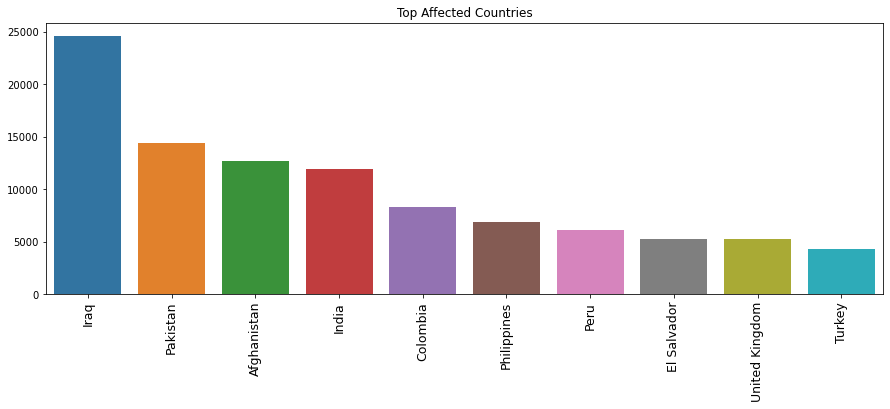

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Country'].value_counts()[:10].index,y=df['Country'].value_counts().values[:10])
plt.title('Top Affected Countries')
plt.xticks(rotation=90,fontsize=12.5)
plt.show()

#### Iraq is the most affected country by terrorist attacks followed by Pakistan and Afghanistan

### Top State Affected by Terrorism

In [57]:
# First check the most affected State in Iraq
df[(df['Country']=='Iraq')]['State'].value_counts().head()

Baghdad     7644
Saladin     3411
Al Anbar    3299
Nineveh     3241
Diyala      3041
Name: State, dtype: int64

In [60]:
#Now check the most affected State all over the world
df['State'].value_counts().head()

Baghdad             7645
Northern Ireland    4498
Unknown             4290
Balochistan         3710
Saladin             3411
Name: State, dtype: int64

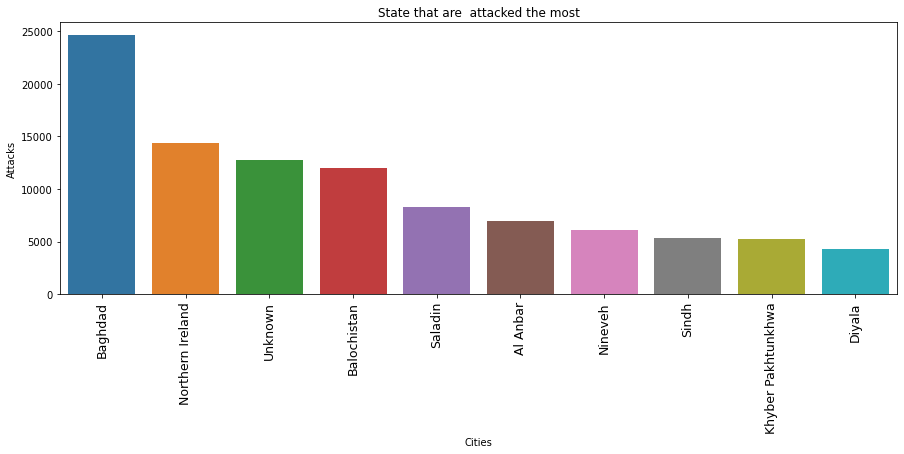

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['State'].value_counts()[:10].index,y=df['Country'].value_counts().values[:10])
plt.title('State that are  attacked the most')
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel('State')
plt.ylabel('Attacks')
plt.show()


#### Baghdad is the most affected city of Iraq and all over the world

### Top Cities affected by Terrorism

In [63]:
#Now check the most affected Cities all over the world
df['city'].value_counts().head()

Unknown    9775
Baghdad    7589
Karachi    2652
Lima       2359
Mosul      2265
Name: city, dtype: int64

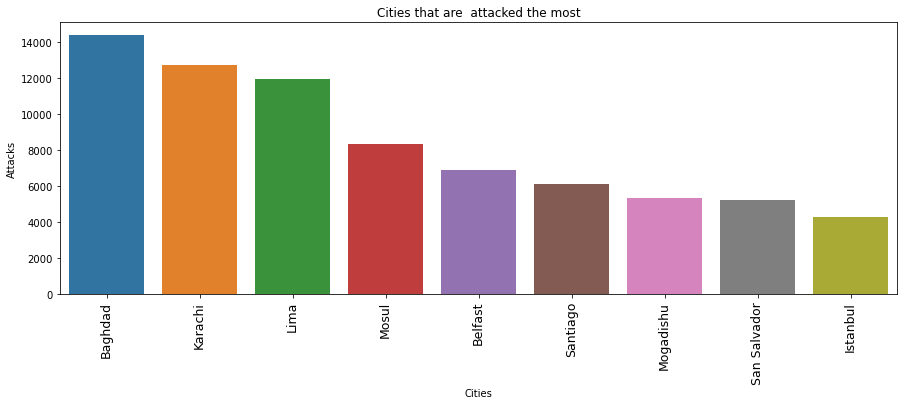

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['city'].value_counts()[1:10].index,y=df['Country'].value_counts().values[1:10])
plt.title('Cities that are  attacked the most')
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel('Cities')
plt.ylabel('Attacks')
plt.show()


### Terror Attacks Over the Years

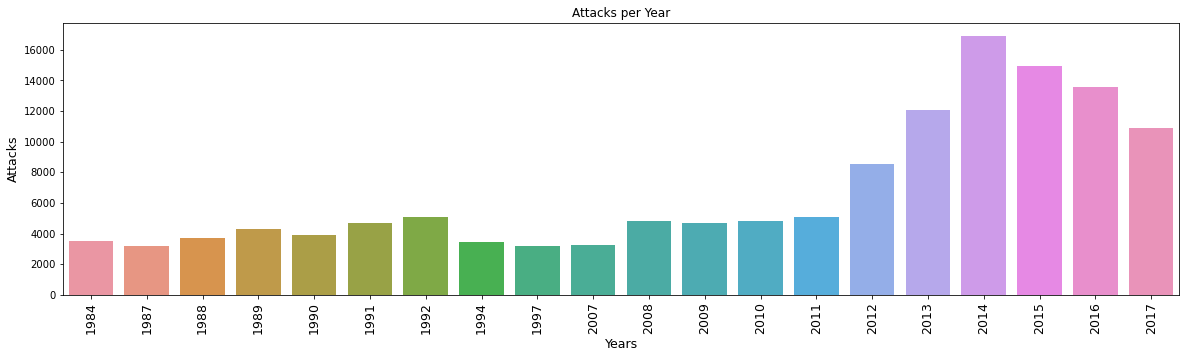

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['Year'].value_counts()[:20].index,y=df['Year'].value_counts().values[:20])
plt.title('Attacks per Year')
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel('Years', fontsize=12.5)
plt.ylabel('Attacks', fontsize=12.5)
plt.show()

- The amount of terror attacks has been relatively low in the years from 1988 - 2011
- Year 2014 has witnessed the highest number of terror attacks reaching beyond 16000


### Type of Attacks by Terrorist

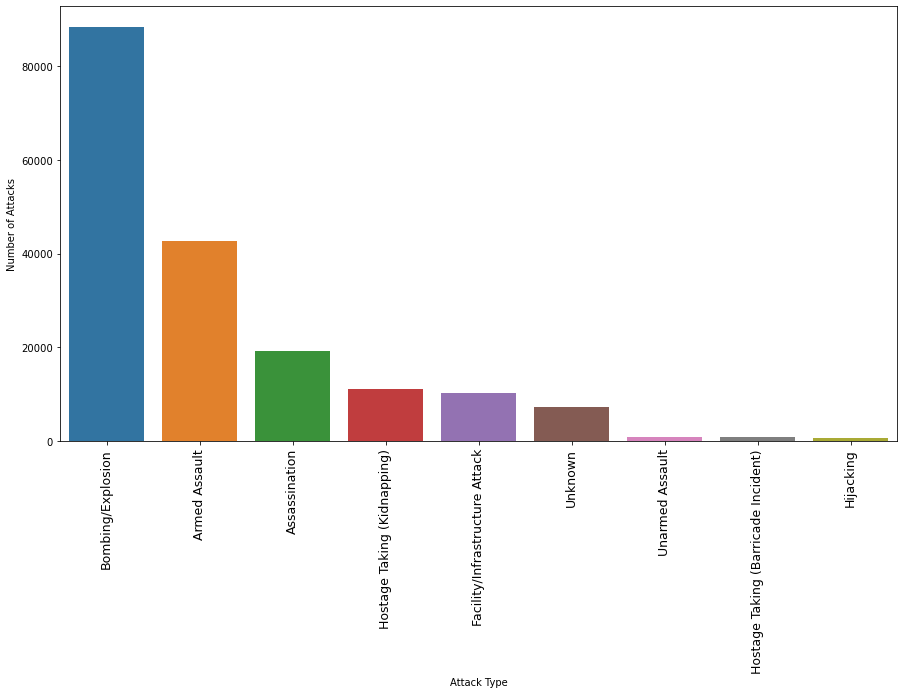

In [47]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['AttackType'],order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()

#### Bombing/Explosion is the most preferred terror attack

### Group hosting Terror attacks

In [65]:
df['Group'].value_counts().head()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group, dtype: int64

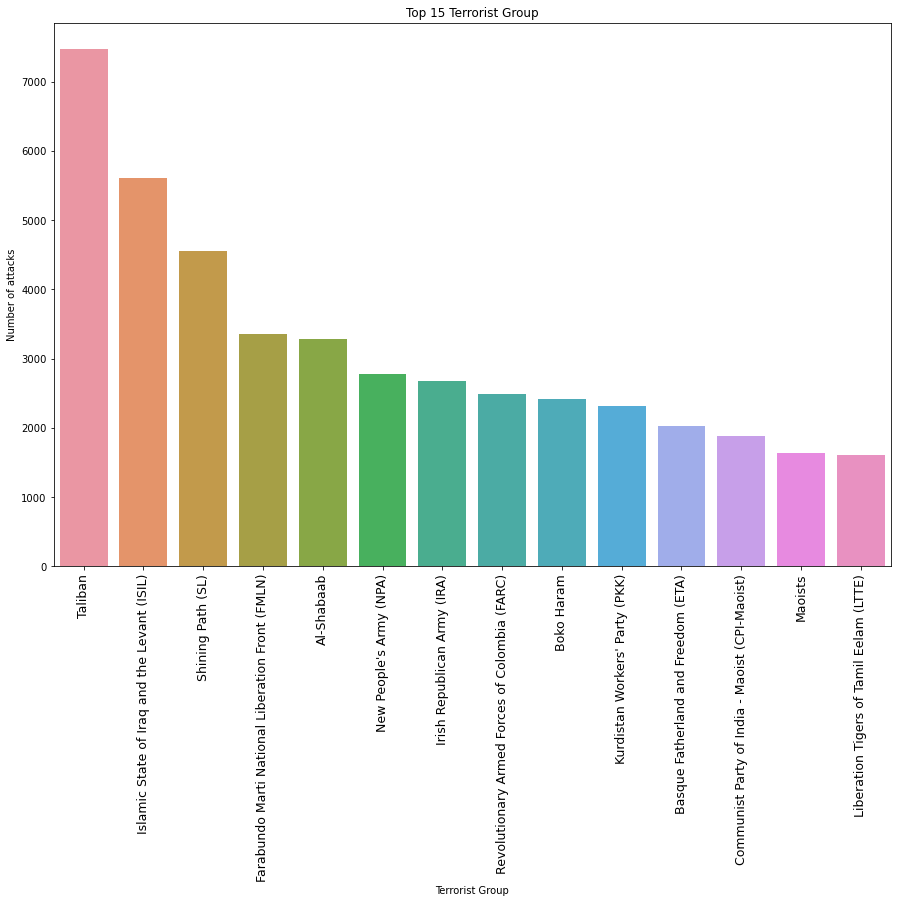

In [48]:
# Visualising the groups hosting terrorist attacks using a bar graph
plt.figure(figsize=(15,10))
sns.barplot(x=df['Group'].value_counts()[1:15].index,y=df['Group'].value_counts().values[1:15])
plt.title('Top 15 Terrorist Group')
plt.xticks(rotation=90,fontsize=12.5)
plt.xlabel("Terrorist Group")
plt.ylabel("Number of attacks")
plt.show()

#### Taliban group has hosted the highest number of attacks followed by Islamic State of Iraq and the Levant (ISIL)

### Properties Affected by Terrorist Attack

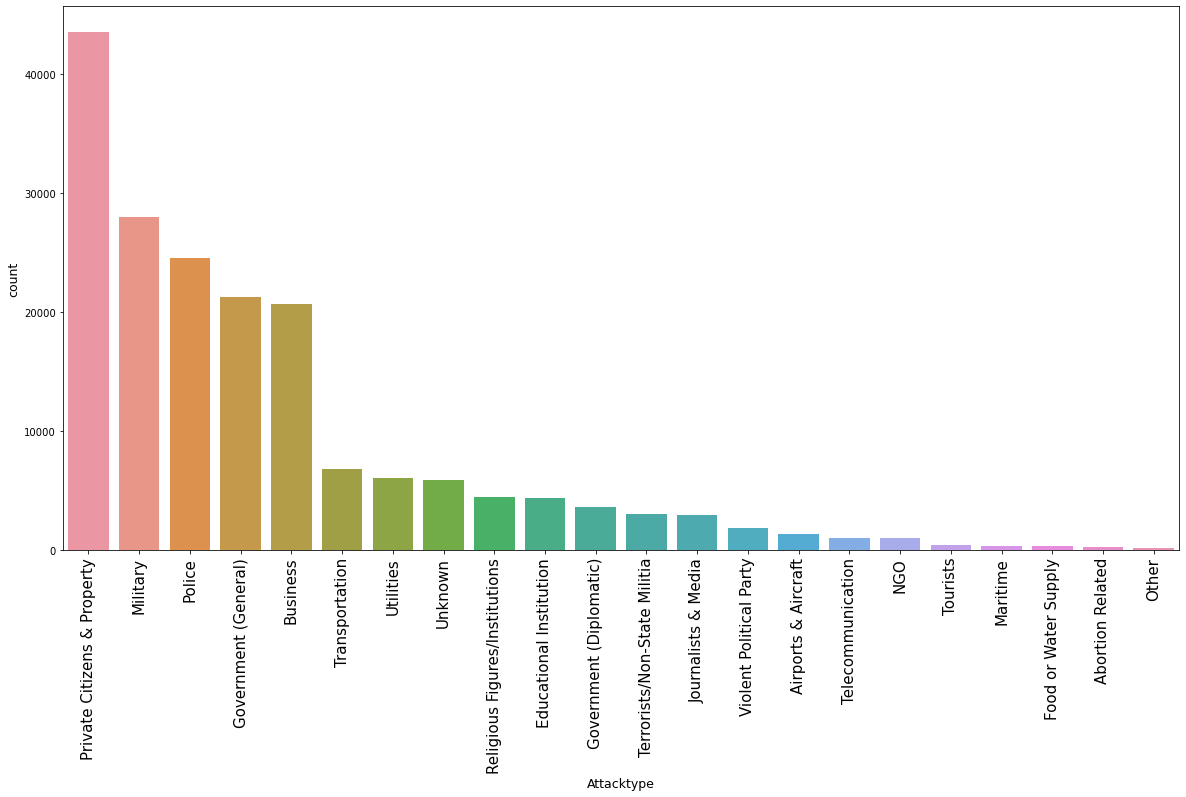

In [71]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Target_type"],order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Attacktype", fontsize=12.5)
plt.ylabel("count", fontsize=12.5)
plt.show()

#### Private Citizens & Property is the most affected property followed by military & police

### Weapons Used in Terror Attack

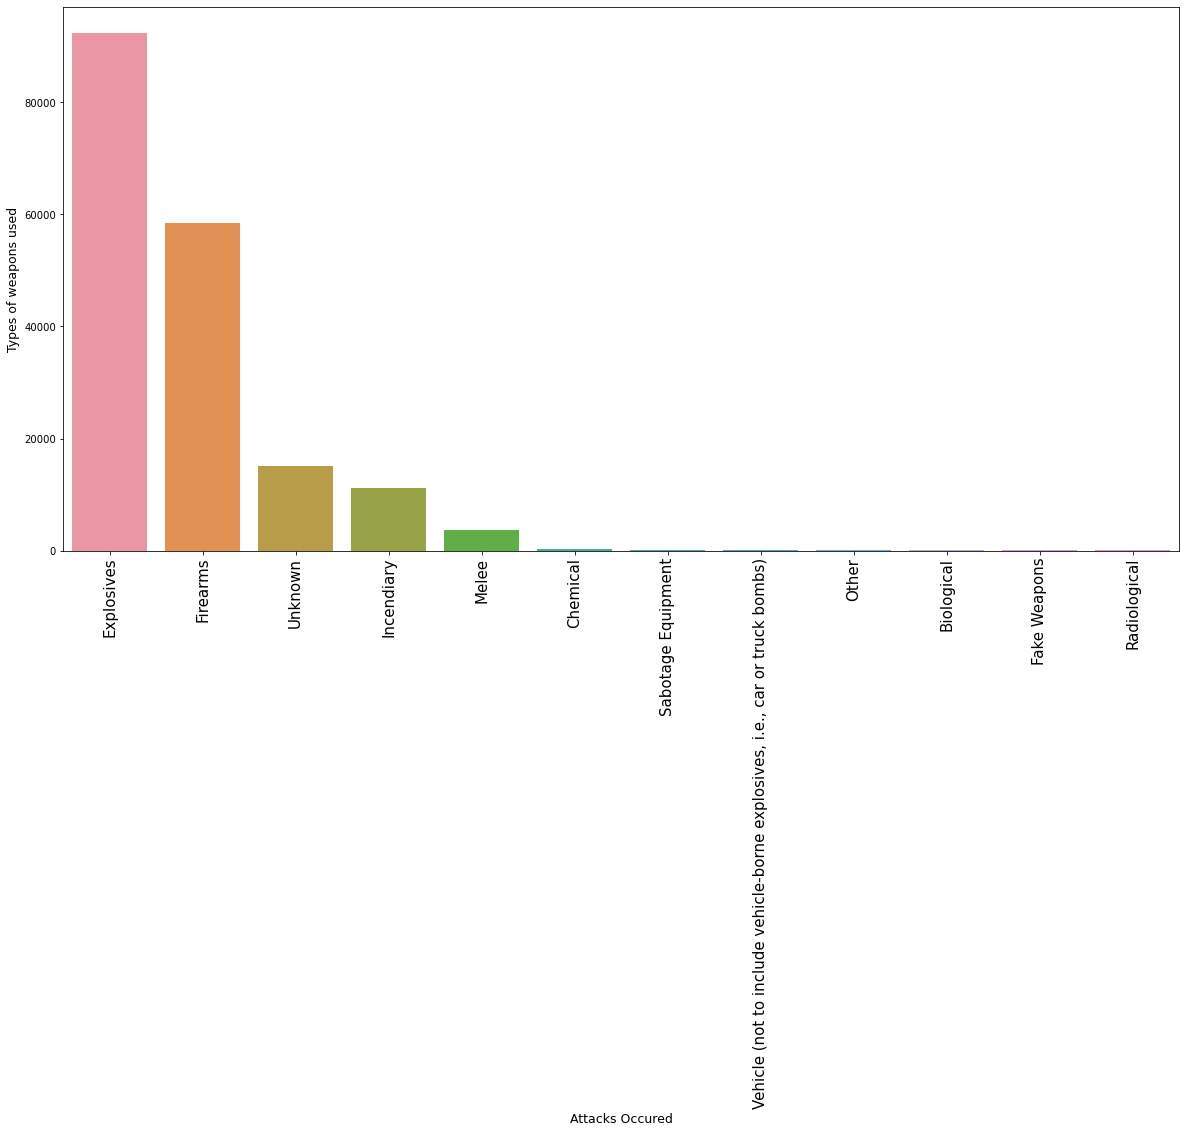

In [70]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Weapon_type"],order=df['Weapon_type'].value_counts().index)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Attacks Occured", fontsize=12.5)
plt.ylabel("Types of weapons used", fontsize=12.5)
plt.show()

#### Explosives are the most widely used weapons during the terrorist attacks

### Type of Terror Attacks

In [66]:
df['AttackType'].value_counts().head()

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: AttackType, dtype: int64

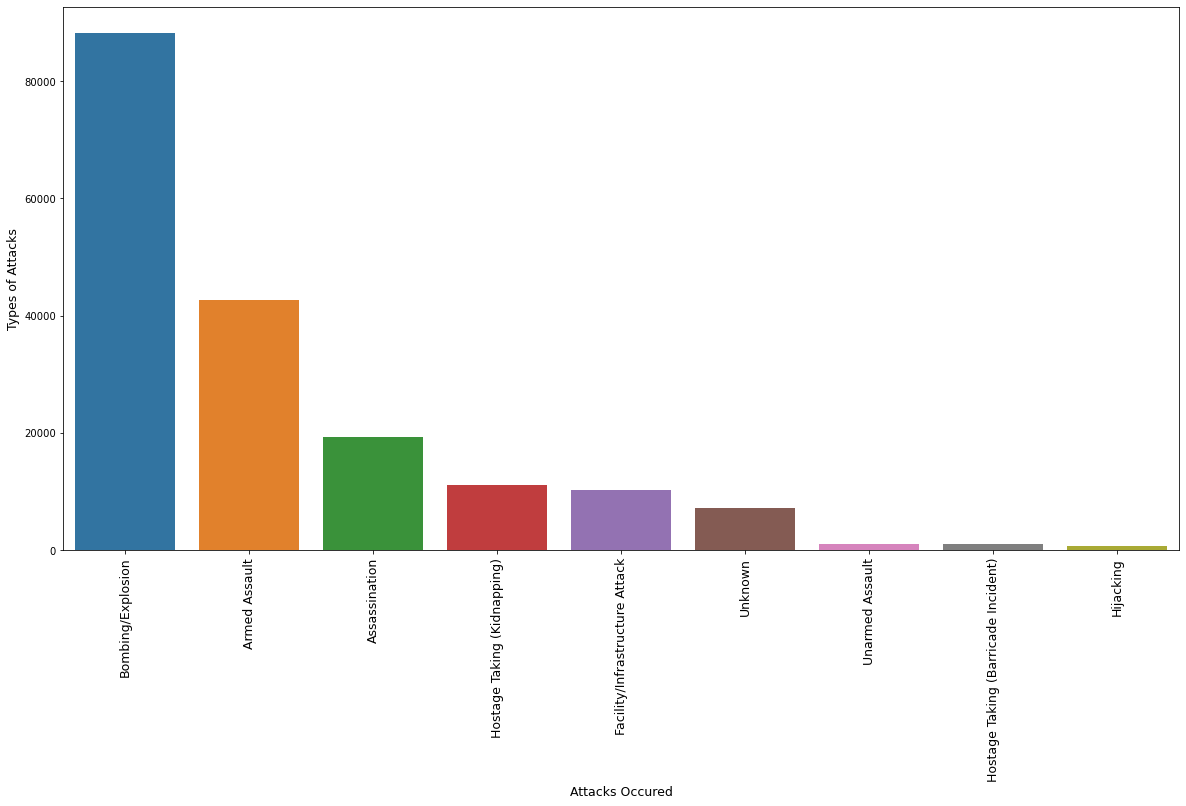

In [68]:
plt.subplots(figsize=(20,10))
sns.countplot(df["AttackType"],order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90, fontsize=12.5)
plt.xlabel("Attacks Occured", fontsize=12.5)
plt.ylabel("Types of Attacks", fontsize=12.5)
plt.show()

#### Bombing/Explosion is the most preferred terror attacks

**Conclusions**

Country with most casualties :  Iraq with 213279(Killed + Wounded)

Country with most kills: Iraq with 24636 kills

Most attacked city: Baghdad with 7645 attacks 

Year 2014 has witnessed the highest number of terror attacks reaching beyond 16000 and least attacks were happened in 1971 and 1973

Largest number of attacks : Bombing/Explosion with the number more than 80000

Most frequent attacking groups : Taliban with 7478 attacks,Islamic State of Iraq and the Levant (ISIL) with 5613 attacks,Shining Path (SL) with 4555 attacks

Most frequent target : Private citizen and Private property

Most Widely used weapons : Explosives

Most harmful attack : Bombing/Explosion with 88255 kills



**Security Measures**

We can clearly see from our vizualization that private citizens and properties are most targeted in all the attacks . So first,we need to secure them. We can give access of CCTV cameras and security numbers to the private persons for their safety. We have to increase numbers of well equiped security,militaries in most targeted areas. Govenments should stay alert always in the most targeted countries and regions. In any suspicious situation , somebody should call the police or cops. For example, an unattended suitcase on a train platform does not necessarily mean anything sinister. Still, the best course of action is to notify a member of staff straight away. Or call the police.